# Bayesian Hierarchical Model based on asteroseismology paper

The oscillatory signature of the second ionization zone of helium in the second differences can be described by the following function:

$\Delta_2\omega_{n,l}=A_{n,l}exp(-2b^{2}\omega_{n,l}^2)cos[2(\tau_{HeII}\omega_{n,l}+d)]+K$

where $\omega_{n,l}$ and $\Delta_2\omega_{n,l}$ are the angular versions of $\nu_{n,l}$ (the frequency of the nth overtone of the p mode with spherical harmonic degree l) and $\Delta_2\nu_{n,l}$ (the second difference in
the p-mode frequencies) respectively, $A$ is the amplitude of the oscillatory component, $\tau_{HeII}$ is the acoustic depth of the second ionization zone of helium, $b$ is the characteristic width of the region, $d$ is a constant that accounts for the phase of the signal, and $K$ is a constant offset.

(-17.95, 376.95)

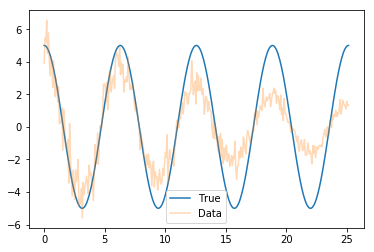

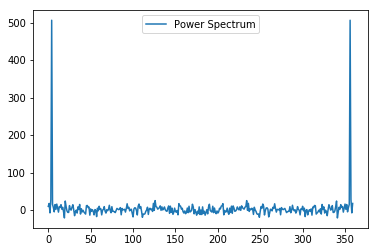

In [61]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

N = 360
nint = 8
A = 5
freq = 1/(2*np.pi)

f = np.linspace(0, np.pi*nint, N)
true = A*np.cos(f)

sigma = 1
noisy = true + np.random.randn(N)
data = noisy*np.exp(-0.05*f)

fig, ax = plt.subplots()
ax.plot(f, true, label='True')
ax.plot(f, data, alpha=0.3, label='Data')
ax.legend()

fft1 = np.fft.fft(data)
fft2 = np.fft.fft(true)

fig, ax = plt.subplots()
ax.plot(fft1, label='Power Spectrum')
ax.legend()
plt.xlim()

In [62]:
code = '''
functions {
    real sin(real freq, real A){
        return A*sin(freq);
    }
}
data {
    int N;
    real f[N];
}
parameters {
    real<lower=0> freq;
    real A;
}
model {
    freq ~ normal(1/6, 1/12);
    A ~ normal(5, 1);
}
'''
import pystan
sm = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c05b47dc2ff79aef3b793c4cb256901a NOW.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/2_/b8v0t8pn1hj1p3r4lyfvvv2h0000gn/T/tmp4b8zuszt/stanfit4anon_model_c05b47dc2ff79aef3b793c4cb256901a_2783113301174712003.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [73]:
stan_data = {'N': len(f),
             'f': f, 
             'freq': freq}
start = {'freq' : 5.0}
nchains = 4
fit = sm.sampling(data=data, iter=1000, chains=nchains, init=[start for n in range(nchains)])

AttributeError: 'numpy.ndarray' object has no attribute 'items'